## Sania Zeb

In [3]:
# Import necessary libraries
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [1]:
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1715215804782_0003,pyspark,idle,Link,Link,


In [2]:
df = spark.read.csv('s3://nyc-tlc/csv_backup/yellow_tripdata_2015*.csv', header=True)

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1715215804782_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[VendorID: string, tpep_pickup_datetime: string, tpep_dropoff_datetime: string, passenger_count: string, trip_distance: string, pickup_longitude: string, pickup_latitude: string, RateCodeID: string, store_and_fwd_flag: string, dropoff_longitude: string, dropoff_latitude: string, payment_type: string, fare_amount: string, extra: string, mta_tax: string, tip_amount: string, tolls_amount: string, improvement_surcharge: string, total_amount: string]

In [5]:
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- RateCodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)

In [6]:
sc.list_packages()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version   
-------------------------- ----------
beautifulsoup4             4.9.3     
boto                       2.49.0    
click                      7.1.2     
jmespath                   0.10.0    
joblib                     0.17.0    
lxml                       4.6.1     
mysqlclient                1.4.2     
nltk                       3.5       
nose                       1.3.4     
numpy                      1.16.5    
pip                        9.0.1     
py-dateutil                2.2       
python37-sagemaker-pyspark 1.4.1     
pytz                       2020.1    
PyYAML                     5.3.1     
regex                      2020.10.28
setuptools                 28.8.0    
six                        1.13.0    
tqdm                       4.51.0    
wheel                      0.29.0    
windmill                   1.6

In [7]:
sc.install_pypi_package("boto3==1.19.2")
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.1")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
sc.list_packages() # everything is installed now!

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version    
-------------------------- -----------
beautifulsoup4             4.9.3      
boto                       2.49.0     
boto3                      1.19.2     
botocore                   1.22.12    
click                      7.1.2      
cycler                     0.11.0     
jmespath                   0.10.0     
joblib                     0.17.0     
kiwisolver                 1.4.5      
lxml                       4.6.1      
matplotlib                 3.2.1      
mysqlclient                1.4.2      
nltk                       3.5        
nose                       1.3.4      
numpy                      1.16.5     
pandas                     1.0.5      
pip                        9.0.1      
py-dateutil                2.2        
pyparsing                  3.1.2      
python-dateutil            2.9.0.post0
python37-sagemaker-pyspark 1.4.1      
pytz                       2020.1     
PyYAML                     5.3.1      
regex                    

In [9]:
# 1. Distribution of Passenger Counts
passenger_counts = df.groupBy('passenger_count').count().orderBy('passenger_count')
passenger_counts.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+
|passenger_count|    count|
+---------------+---------+
|              0|    40853|
|              1|102991045|
|              2| 20901372|
|              3|  6135107|
|              4|  2981071|
|              5|  7939001|
|              6|  5123951|
|              7|      239|
|              8|      181|
|              9|      169|
+---------------+---------+

In [10]:
# 2. Descriptive Statistics for Trip Distance and Total Fare Amount
trip_distance_fare_stats = df.select('trip_distance', 'total_amount').describe()
trip_distance_fare_stats.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------------+
|summary|     trip_distance|      total_amount|
+-------+------------------+------------------+
|  count|         146112989|         146112989|
|   mean|13.137274740509154|16.096247288503385|
| stddev|19875.100394834906| 356.9935589086115|
|    min|      -10378602.40|             -0.31|
|    max|            997.10|            999.19|
+-------+------------------+------------------+

In [11]:
# 3. Counts of Trips Over Time
df = df.withColumn('pickup_datetime', F.to_timestamp('tpep_pickup_datetime'))
df = df.withColumn('pickup_date', F.to_date('pickup_datetime'))
trip_counts_time_series = df.groupBy('pickup_date').count().orderBy('pickup_date')
trip_counts_time_series.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|pickup_date| count|
+-----------+------+
| 2015-01-01|382014|
| 2015-01-02|345296|
| 2015-01-03|406769|
| 2015-01-04|328848|
| 2015-01-05|363454|
| 2015-01-06|384324|
| 2015-01-07|429653|
| 2015-01-08|450920|
| 2015-01-09|447947|
| 2015-01-10|515540|
| 2015-01-11|419629|
| 2015-01-12|396367|
| 2015-01-13|448517|
| 2015-01-14|442656|
| 2015-01-15|451186|
| 2015-01-16|478124|
| 2015-01-17|476827|
| 2015-01-18|427042|
| 2015-01-19|342795|
| 2015-01-20|405581|
+-----------+------+
only showing top 20 rows

In [12]:
# 4. Descriptive Statistics for Tip Amounts
tip_amount_stats = df.select('tip_amount').describe()
tip_amount_stats.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+
|summary|       tip_amount|
+-------+-----------------+
|  count|        146112989|
|   mean|1.728441693291236|
| stddev|326.8367268905529|
|    min|            -0.01|
|    max|            99.99|
+-------+-----------------+

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

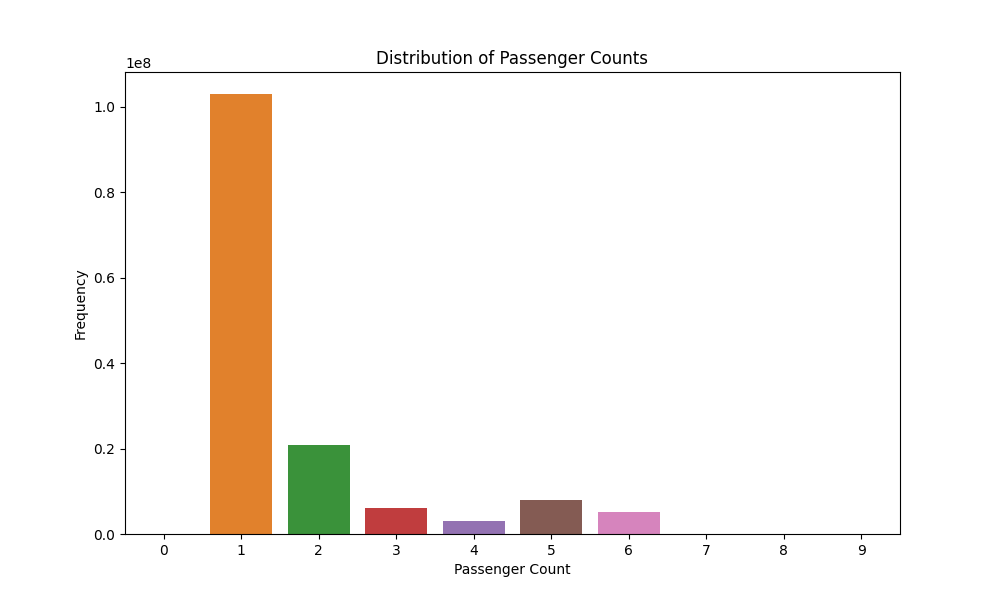

In [18]:
# 1. Distribution of Passenger Counts (Bar plot)
passenger_counts_pd = passenger_counts.toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='count', data=passenger_counts_pd)
plt.title('Distribution of Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

%matplot plt

By visualizing the distribution of passenger counts, we can understand common scenarios such as solo rides, rides with multiple passengers, and the frequency of different passenger counts. Where we can see from the above plot that solo rides are dominant. This information helps us understand the composition of taxi trips and potential variations in passenger count per trip.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

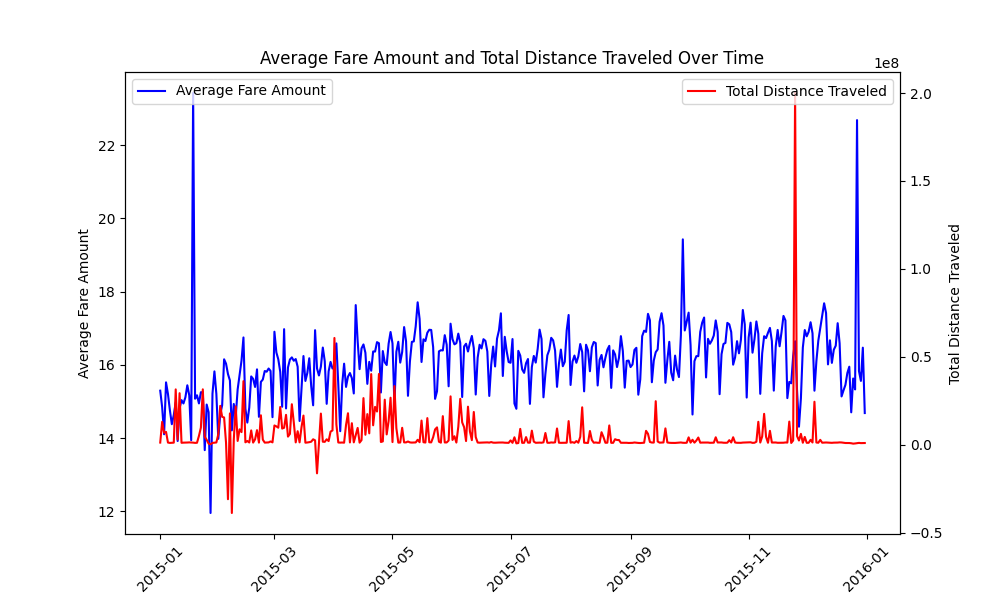

In [35]:
# 2. Trip Distance vs. Average Fare Amount

from pyspark.sql.functions import col, to_date

# Convert tpep_pickup_datetime column to date format
df = df.withColumn('pickup_date', to_date(col('tpep_pickup_datetime')))

# Calculate average fare amount per day
avg_fare_per_day = df.groupby('pickup_date').agg({'total_amount': 'mean'}).orderBy('pickup_date')

# Calculate total distance traveled per day
total_distance_per_day = df.groupby('pickup_date').agg({'trip_distance': 'sum'}).orderBy('pickup_date')

# Convert to Pandas DataFrame for plotting
avg_fare_per_day_pd = avg_fare_per_day.toPandas()
total_distance_per_day_pd = total_distance_per_day.toPandas()

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

# Plot line plot for average fare amount per day
plt.figure(figsize=(10, 6))
plt.plot(avg_fare_per_day_pd['pickup_date'], avg_fare_per_day_pd['avg(total_amount)'], label='Average Fare Amount', color='blue')
plt.title('Average Fare Amount and Total Distance Traveled Over Time')
plt.xlabel('Date')
plt.ylabel('Average Fare Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc='upper left')

# Plot line plot for total distance traveled per day
plt.twinx()  # Create a secondary y-axis
plt.plot(total_distance_per_day_pd['pickup_date'], total_distance_per_day_pd['sum(trip_distance)'], label='Total Distance Traveled', color='red')
plt.ylabel('Total Distance Traveled')
plt.legend(loc='upper right')

plt.show()

%matplot plt

This graphical illustration analyzes trip's total distance travelled and average fare amount over time. It can reveal trends and patterns in taxi rides over time to identify outliers and seasonality in rides distance and fare over time where we can see that fares are quite high during peak winter months.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

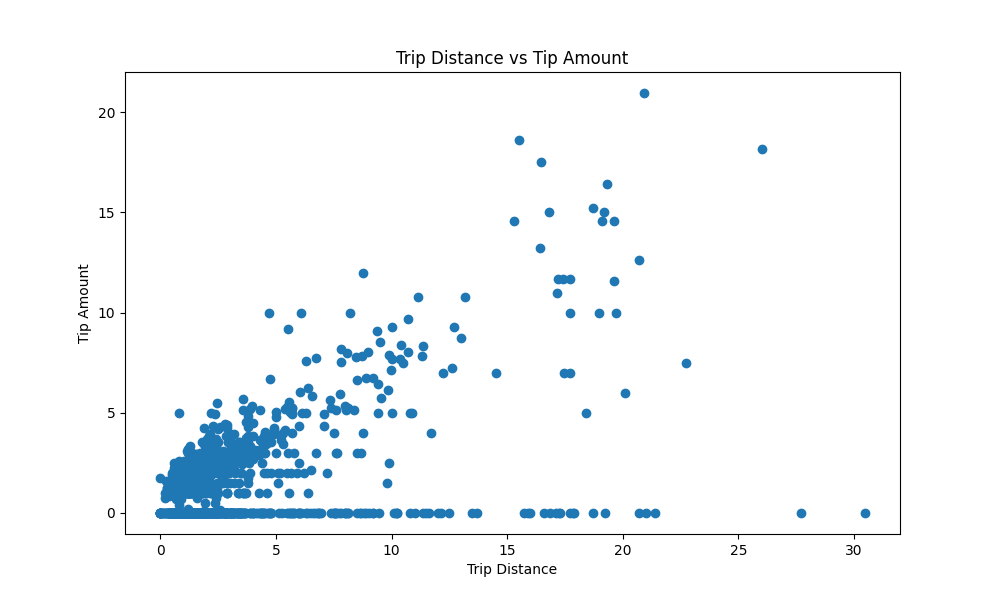

In [49]:
# 3. Scatter Plot b/w Trip Distance vs Tip Amount

#Sample fraction of DataFrame
sampled_df = df.sample(fraction=0.00001)

# Convert the sampled DataFrame to Pandas DataFrame
pdf_sampled = sampled_df.toPandas()

# Close previous plots
plt.close()

# Plot scatter plot for trip distance vs total amount
plt.figure(figsize=(10, 6))
plt.scatter(pdf_sampled['trip_distance'], pdf_sampled['tip_amount'])
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()


%matplot plt

The scatter plot of tip amount against trip distance provides insights into potential relationships between these variables. We can see that the higher travel distance is related to higher average tip, however, there are a few outliers with zero tips. It helps identify whether longer trips tend to yield higher tips or if there are outliers where short trips result in unusually high tips. It helps in optimizing strategies for maximizing tip earnings and improving customer service based on trip length.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

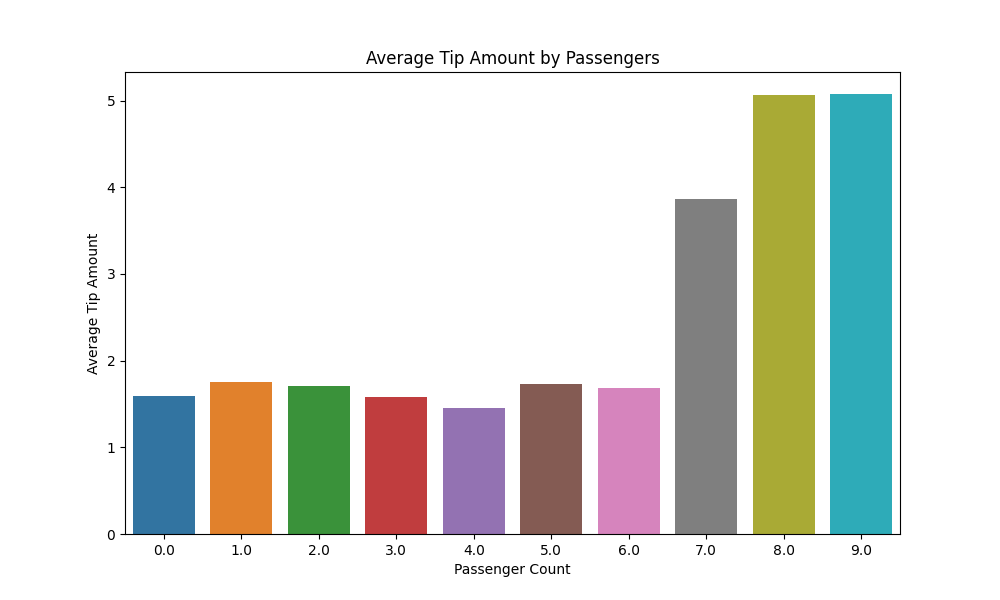

In [36]:
# 4. Average Tip Amount

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

# Calculate average tip amount by passenger count
avg_tip_by_passenger_count = df.groupBy('passenger_count').agg(F.avg('tip_amount').alias('avg_tip_amount'))

# Convert to Pandas DataFrame for plotting
avg_tip_by_passenger_count_pd = avg_tip_by_passenger_count.toPandas()

# Plot average tip amount by passenger count
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='avg_tip_amount', data=avg_tip_by_passenger_count_pd)
plt.title('Average Tip Amount by Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Amount')
plt.show()

%matplot plt

This plot illustrates the relationship between the number of passengers in a trip and the average tip amount received. It helps understand tipping behavior based on the passenger count, providing insights into tipping habits and preferences. We can see that higher the number of passenger higher is the average tip amount.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

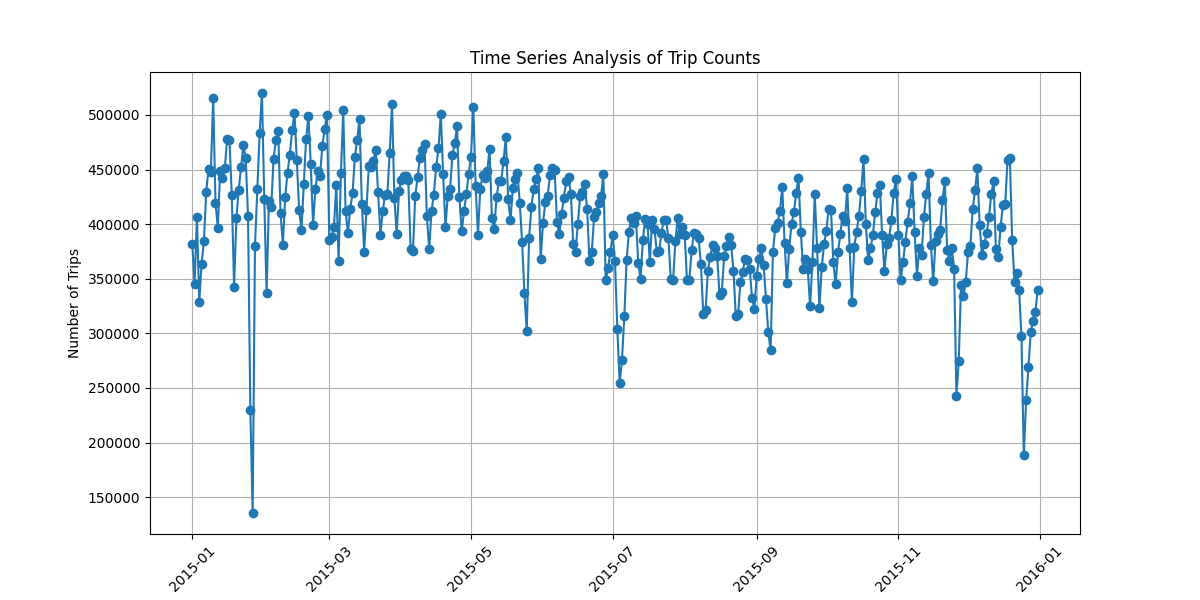

In [21]:
# 5. Time Series Analysis of Trip Counts (Line plot)

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

trip_counts_time_series_pd = trip_counts_time_series.toPandas()
plt.figure(figsize=(12, 6))
plt.plot(trip_counts_time_series_pd['pickup_date'], trip_counts_time_series_pd['count'], marker='o')
plt.title('Time Series Analysis of Trip Counts')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

%matplot plt

By analyzing the time series of trip counts as in the above plot, we can identify trends, seasonality, and anomalies in taxi demand over different time periods (e.g., daily, weekly, monthly). In our plot, number of trips dominate around winter months in NYC. Understanding temporal patterns is essential for optimizing taxi fleet management, pricing strategies, and resource allocation based on fluctuating demand.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

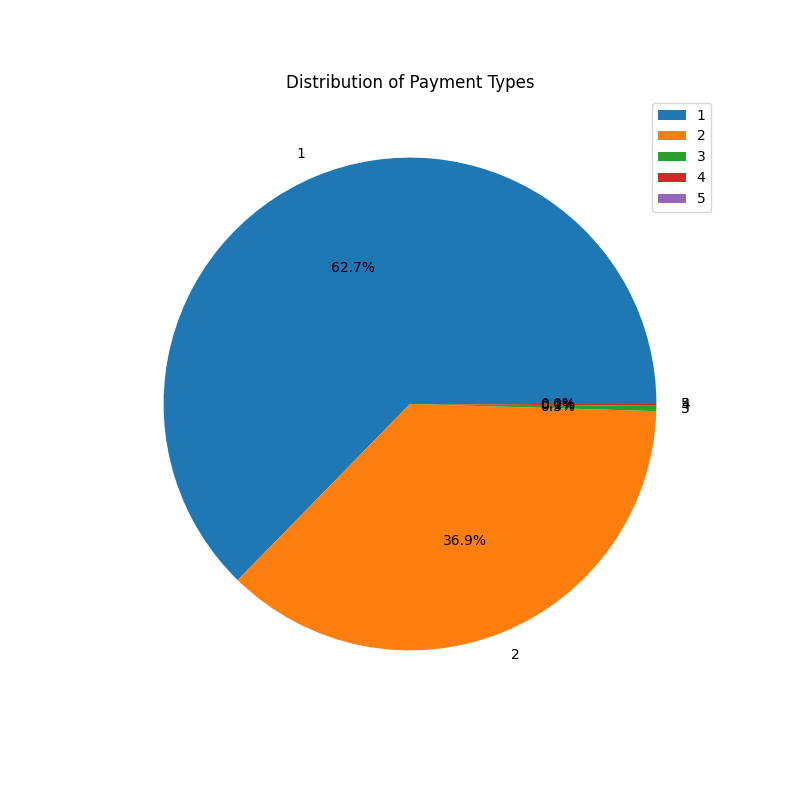

In [37]:
# 6. Pie Chart for Payment Types

#Close previous plots; otherwise, will just overwrite and display again
plt.close()

payment_counts = df.groupBy('payment_type').count().orderBy('payment_type')
payment_counts.show()

# Plotting Pie Chart
payment_counts_pd = payment_counts.toPandas()
plt.figure(figsize=(8, 8))
plt.pie(payment_counts_pd['count'], labels=payment_counts_pd['payment_type'], autopct='%1.1f%%')
plt.title('Distribution of Payment Types')
plt.legend(payment_counts_pd['payment_type'], loc='upper right')  # Add legend with payment types
plt.show()

%matplot plt

Understanding the distribution of payment types (e.g., credit card, cash) provides insights into passenger payment preferences and the overall payment ecosystem. It can also inform strategies for integrating payment technologies and optimizing payment processes for taxi services by the company.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

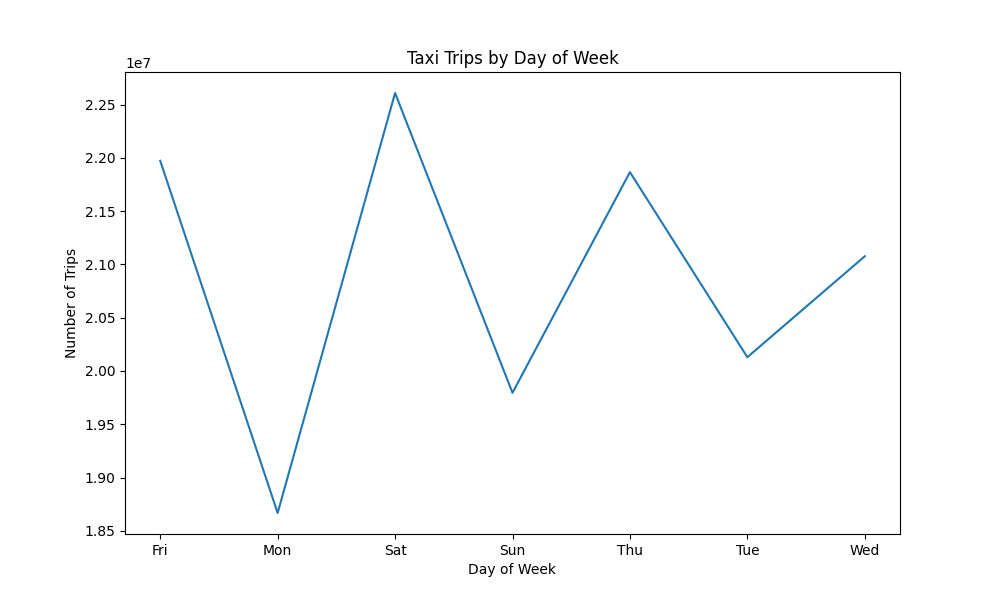

In [29]:
# 7. Taxi Trips by Days of Week

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

df = df.withColumn('pickup_day_of_week', F.date_format('pickup_date', 'E'))

# Count Taxi Trips by Day of Week
trips_by_day_of_week = df.groupBy('pickup_day_of_week').count().orderBy('pickup_day_of_week')
trips_by_day_of_week.show()

# Plotting Line Plot
trips_by_day_of_week_pd = trips_by_day_of_week.toPandas()
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_day_of_week', y='count', data=trips_by_day_of_week_pd)
plt.title('Taxi Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()

%matplot plt

Analyzing the variation in taxi trips across different days of the week helps understand weekly travel patterns, peak days, and off-peak periods. We can clearly see that taxi trips peak around weekend where people go out more. It provides insights into factors influencing taxi demand, such as weekday commutes, weekend leisure activities, and special events.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

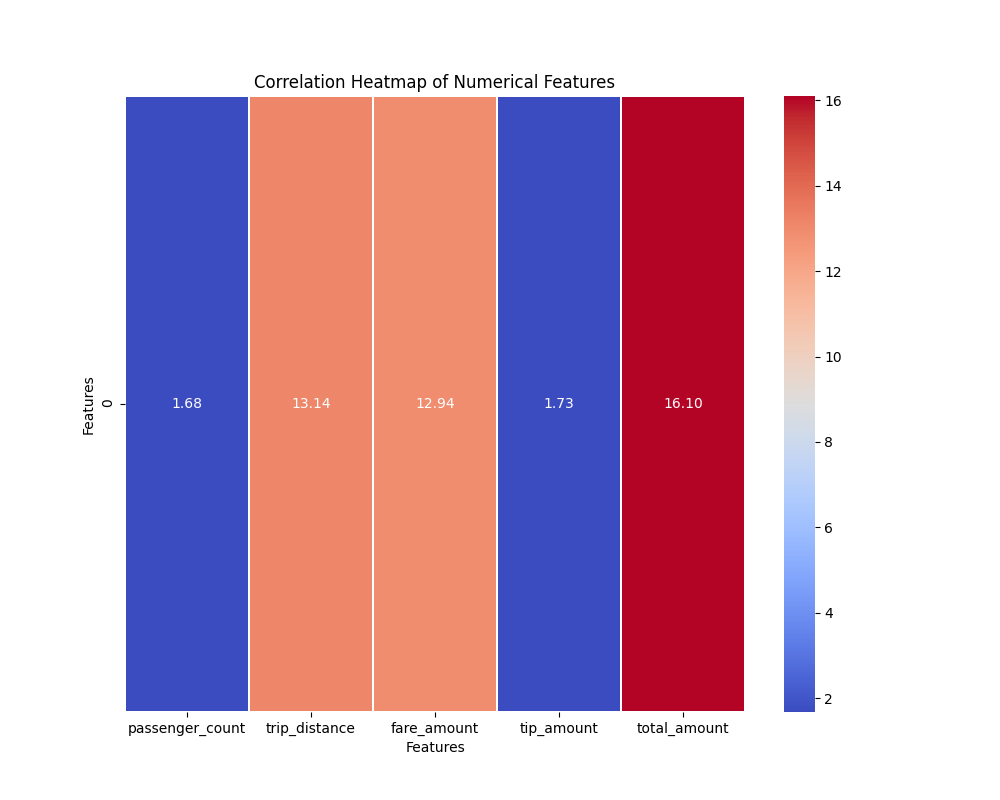

In [30]:
# 8. Predicting Tip Amount for a Given Trip

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

from pyspark.sql.types import FloatType
import seaborn as sns
import matplotlib.pyplot as plt

# Convert numerical features to appropriate data types
df = df.withColumn('passenger_count', df['passenger_count'].cast(FloatType()))
df = df.withColumn('trip_distance', df['trip_distance'].cast(FloatType()))
df = df.withColumn('fare_amount', df['fare_amount'].cast(FloatType()))
df = df.withColumn('tip_amount', df['tip_amount'].cast(FloatType()))
df = df.withColumn('total_amount', df['total_amount'].cast(FloatType()))

# Aggregate numerical features
numerical_features = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
agg_exprs = [F.mean(col).alias(col) for col in numerical_features]
aggregated_df = df.agg(*agg_exprs)

# Collect aggregated data to the driver node
aggregated_data = aggregated_df.collect()[0]

# Create a Pandas DataFrame from aggregated data
correlation_data = [aggregated_data[col] for col in numerical_features]
correlation_matrix = pd.DataFrame([correlation_data], columns=numerical_features)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

%matplot plt

This heatmap helps us identify features that have a strong correlation with the tip amount. We can see that trip distance has a key impact on tip amount. Features with high positive or negative correlations are potentially predictive of the tip amount and can be used as input features in predictive models.